In [4]:
# 事前準備
# neko.txt.mecabファイル生成は下記コマンドをターミナルで実施
# mecab -o ./neko.txt.mecab ./neko.txt

# 30.形態素解析結果の読み込み
filename = './neko.txt.mecab'

sentences = []
morphs = []
with open(filename, mode='r') as f:
    for line in f:
        if line != 'EOS\n':
            fields = line.split('\t')
            if len(fields) != 2 or fields[0] == '':  # 文頭以外の空白と改行文字はスキップ
                continue
            else:
                attr =  fields[1].split(',')
                morph = {'surface': fields[0], 'base': attr[6], 'pos': attr[0], 'pos1': attr[1]}
                morphs.append(morph)
        else:
            sentences.append(morphs)
            morphs = []

In [5]:
# 31.動詞
ans = set() # 結果を重複させないようにset型にする
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] == '動詞':
      ans.add(morph['surface'])


In [6]:
# 32.動詞の基本形
ans = set()
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] == '動詞':
      ans.add(morph['base'])

ans_list = list(ans)
for i in range(5):
    print(ans_list[i])

懲りる
寄り付く
外す
張れる
あらす


In [7]:
# 33.AのB
ans = set()
for sentence in sentences:
  for i in range(len(sentence)-2):
    if sentence[i]['pos'] == '名詞' and sentence[i+1]['surface'] == 'の' and sentence[i+2]['pos'] == '名詞':
      ans.add(sentence[i]['surface'] + 'の' + sentence[i+2]['surface']) # 名詞句をadd

print(len(ans))
ans_list = list(ans)
for i in range(5):
  print(ans_list[i])

4924
真先の烏
神田の西洋
軽蔑の意
吾輩の前
屋の話


In [8]:
# 34.名詞の連接
ans = set()
noun = []
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] == '名詞': # 名詞の場合はnounリストに追加
            noun.append(morph['surface'])
        else: # 名詞以外の場合はnounリストに入っている名詞を結合してansに追加
            if len(noun) >= 2:
                ans.add(''.join(noun))
                noun = []
            else: # nounリストが0or1の場合は初期化
                noun = []
# 最後は句点がくるはずなので、最後にnounを追加する処理はいらない？
print(len(ans))
ans_list = list(ans)
for i in range(10):
    print(ans_list[i])

4457
垣巡り
揚句ここ
集注
何点
上瞼
姫様
二大厄
差支
休養以外
隣座敷


In [9]:
# 35.単語の出現頻度
from collections import defaultdict

ans = defaultdict(int)
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] != '記号':
            ans[morph['base']] += 1  # 単語数の更新(初登場の単語であれば1をセット)
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

for i in range(10):
    print(ans[i])


('の', 9194)
('て', 6848)
('は', 6420)
('に', 6243)
('を', 6071)
('だ', 5975)
('と', 5508)
('が', 5337)
('た', 4267)
('する', 3657)


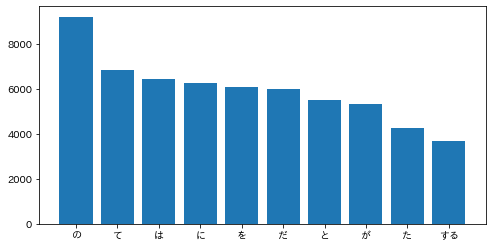

In [10]:
# 36. 頻度上位10語
import matplotlib.pyplot as plt
import japanize_matplotlib

ans = defaultdict(int)
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] != '記号':
            ans[morph['base']] += 1  # 単語数の更新(初登場の単語であれば1をセット)
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

keys = [a[0] for a in ans[0:10]]
values = [a[1] for a in ans[0:10]]

plt.figure(figsize=(8, 4))
plt.bar(keys, values)
plt.show()

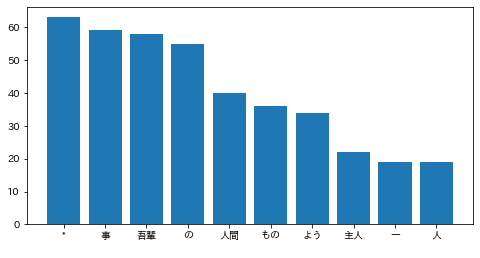

In [12]:
# 37. 「猫」と共起頻度の高い上位10語（名詞ver.）

ans = defaultdict(int)
for sentence in sentences:
    if '猫' in [morph['surface'] for morph in sentence]:
        for morph in sentence:
            if morph['pos'] == '名詞':
                ans[morph['base']] += 1
del ans['猫']

ans = sorted(ans.items(),key=lambda x:x[1], reverse=True)

keys = [a[0] for a in ans[0:10]]
values = [a[1] for a in ans[0:10]]

plt.figure(figsize=(8, 4))
plt.bar(keys, values)
plt.show()

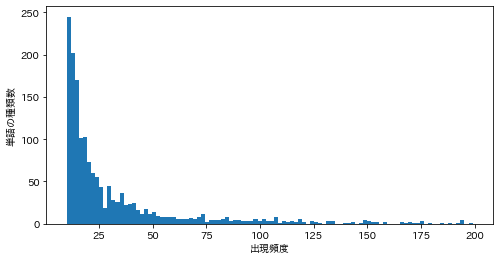

In [26]:
# 38. ヒストグラム
ans = defaultdict(int)
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] != '記号':
            ans[morph['base']] += 1
ans = list(ans.values())

# 試しに出現頻度が10〜200回の単語数を確認してみる
ans = [a for a in ans if 10 <= a <= 200]

plt.figure(figsize=(8, 4))
plt.hist(ans, bins=100)
plt.xlabel('出現頻度')
plt.ylabel('単語の種類数')
plt.show()


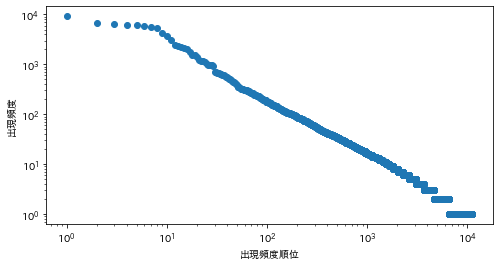

In [27]:
# 39. zipfの法則
import math

ans = defaultdict(int)
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] != '記号':
      ans[morph['base']] += 1
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

ranks = [r + 1 for r in range(len(ans))]
values = [a[1] for a in ans]

plt.figure(figsize=(8, 4))
plt.scatter(ranks, values)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')
plt.show()